<a href="https://colab.research.google.com/github/vipra88/Movie-ML-NLP-Recommendation-System/blob/main/Movie_ML_and_recommedation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised


# **Project Summary -**

Write the summary here within 500-600 words.


The Movies Dataset
Metadata on over 45,000 movies. 26 million ratings from over 270,000 users.
Last Updated: 7 years ago (Version 7)

About this Dataset
Context
These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

Content
This dataset consists of the following files:

movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

keywords.csv: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

links.csv: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Dataset Overview:

Movie Details: Such as title, release date, and runtime.

Financial Metrics: Including budget and revenue figures.

Popularity Metrics: Such as popularity scores and vote counts.

Casting Information: Names of the main cast members.

Production Details: Involving production companies and directors.

Genre Classification: Categorizing movies into different genres.

Additional Information: Such as taglines, keywords, and an overview of the movie.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [171]:
# Import Libraries
## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import time
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [172]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
# Load Dataset

movies= pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
credit= pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')




In [174]:
# merge two data file
movies=movies.merge(credit,on='title')

In [175]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

### Dataset First View

In [176]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

### Dataset Rows & Columns count

In [177]:
# Dataset Rows & Columns count
print(f"Rows and Column count in the Dataset: Rows= {movies.shape[0]}, Columns= {movies.shape[1]}")

Rows and Column count in the Dataset: Rows= 4809, Columns= 23


### Dataset Information

#### Duplicate Values

In [178]:
 # Dataset Duplicate Value Count
duplicate_count = movies.duplicated().sum()
print(f"The total number of duplicated observations in the dataset: {duplicate_count}")

The total number of duplicated observations in the dataset: 0


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [179]:
# Dataset Columns
print(f"Available columns:\n{movies.columns.to_list()}")

Available columns:
['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count', 'movie_id', 'cast', 'crew']


In [180]:
# Dataset Describe
movies.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
budget,4809.0,NaN,NaN,NaN,29027802.936369,40704731.389679,0.0,780000.0,15000000.0,40000000.0,380000000.0
genres,4809,1175,"[{""id"": 18, ""name"": ""Drama""}]",372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage,1713,1691,http://www.missionimpossible.com/,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,4809.0,NaN,NaN,NaN,57120.571429,88653.369849,5.0,9012.0,14624.0,58595.0,459488.0
keywords,4809,4222,[],412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_language,4809,37,en,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
original_title,4809,4801,Out of the Blue,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overview,4806,4800,Gang-du is a dim-witted man working at his fat...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,4809.0,NaN,NaN,NaN,21.491664,31.803366,0.0,4.66723,12.921594,28.350529,875.581305
production_companies,4809,3697,[],352,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

Answer Here

1.id: An integer value serving as a unique identifier for each entry in the dataset.

2.imdb_id: A unique identifier provided by IMDb for each movie.

3.popularity: A float value indicating the popularity score of the movie.

4.budget: An integer value representing the budget of the movie.

5.revenue: An integer value representing the revenue generated by the movie.

6.cast: Names of the main cast members of the movie.

7.homepage: The URL of the movie's official website, if available.

8.director: The name of the director of the movie.

9.tagline: A short memorable phrase associated with the movie, often used in marketing.

10.keywords: Keywords or phrases associated with the movie for indexing and searching purposes.

11.overview: A brief summary or description of the movie.

12.runtime: The duration of the movie in minutes.

13.genres: Categories or genres that the movie belongs to.

14.production_companies: Names of the production companies involved in making the movie.

15.release_date: The date when the movie was released.

16.vote_count: The count of votes given to the movie.

17.vote_average: The average rating given to the movie.

18.release_year: The year when the movie was released.





### Check Unique Values for each variable.

In [181]:
# Check Unique Values for each variable.
movies.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
movie_id                4803
cast                    4761
crew                    4776
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

1. Handling Null values from each feature


In [182]:
 # Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(movies.isna().sum())
print("-"*50)

# Let's find out the percentage of null values in each category in order to deal with it.
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = movies.isnull().sum()/len(movies)
print(f"{null_count_by_variable*100}%")
print("-"*50)

--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
budget                   0.0

In [183]:
# I will not use these columns in my notebook
droped_colmuns = ['homepage', 'tagline']
movies.drop(columns=droped_colmuns, inplace=True)

In [184]:
movies["budget"].value_counts()

budget
0           1039
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
13400000       1
13200000       1
14350531       1
3100000        1
9000           1
Name: count, Length: 436, dtype: int64

### Handeling Unrealistic Values

In [185]:
# drop null value
movies.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64

In [186]:
movies.duplicated().sum()

0

In [187]:
print(movies.columns)  # Display the column names

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')


In [188]:
# Accessing the genres of the first movie
movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [189]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [190]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return ', '.join(L)

In [191]:
movies['genres']=movies['genres'].apply(convert)

In [192]:
movies['keywords']=movies['keywords'].apply(convert)

In [193]:
movies['country']=movies['production_countries'].apply(convert)

In [194]:
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i['name'])
            counter += 1
        else:
            break
        return ', '.join(L)

In [195]:
movies['cast']=movies['cast'].apply(convert3)

In [196]:
movies['cast'].sample(5)

3752         Jack Lemmon
453         Steve Martin
2781          Vin Diesel
259       Sandra Bullock
2109    Sigourney Weaver
Name: cast, dtype: object

In [197]:
def fetch_director(obj):
    L = []  # Initialize an empty list to store the director's name(s)

    for i in ast.literal_eval(obj):  # Safely evaluate the string to a list of dictionaries
        if i['job'] == "Director":  # Check if the current dictionary represents the director's role
            L.append(i['name'])  # Append the director's name to the list
            break  # Break out of the loop since we found the director

    return ', '.join(L)  # Convert the list to a string and return it

In [198]:
movies['Director']=movies['crew'].apply(fetch_director)

In [199]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [200]:
# Assuming you have a DataFrame 'movies' with an 'overview' column

# Example code using lambda function
movies['overview'] = movies['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])


### What all manipulations have you done and insights you found?

Answer Here

1.We have 4749 Rows With Zero budget, That is Too Wierd
2. We can count these Values as outlires
3. I can't drop them because they are a lot , about 50% of the Dataset
4.Budget Graphs Won't be good and it will be misleading
5.So let's Know more information about these Zero Budgets

### Outlires


INSIGHT

Outlires here is many,
1. this is too acceptable because there are movies that have more budgets, revenues,... than others
2.runtime is the only colmun that i think that oulires is accepted because most of movies are close together
3.But i won't remove anything

### Make Profit Column

In [201]:
# Making the profit column to use it in the EDA
movies["profit"] = movies["revenue"] - movies["budget"]


In [202]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,movie_id,cast,crew,country,Director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Avatar,7.2,11800,19995,Sam Worthington,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","United States of America, United Kingdom",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,Johnny Depp,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",United States of America,Gore Verbinski,661000000
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,Spectre,6.3,4466,206647,Daniel Craig,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","United Kingdom, United States of America",Sam Mendes,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Dark Knight Rises,7.6,9106,49026,Christian Bale,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",United States of America,Christopher Nolan,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,John Carter,6.1,2124,49529,Taylor Kitsch,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",United States of America,Andrew Stanton,24139100


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 What's the most popular movies? (top 10)¶



In [203]:
 # Top 10 popular movies

top_ten_popular = movies.nlargest(10,"popularity")[["original_title", "popularity"]]

In [204]:
# groupby top ten popular movies

top_ten_popular.groupby("original_title")["popularity"].sum().sort_values(ascending=False)

original_title
Minions                                                   875.581305
Interstellar                                              724.247784
Deadpool                                                  514.569956
Guardians of the Galaxy                                   481.098624
Mad Max: Fury Road                                        434.278564
Jurassic World                                            418.708552
Pirates of the Caribbean: The Curse of the Black Pearl    271.972889
Dawn of the Planet of the Apes                            243.791743
The Hunger Games: Mockingjay - Part 1                     206.227151
Big Hero 6                                                203.734590
Name: popularity, dtype: float64

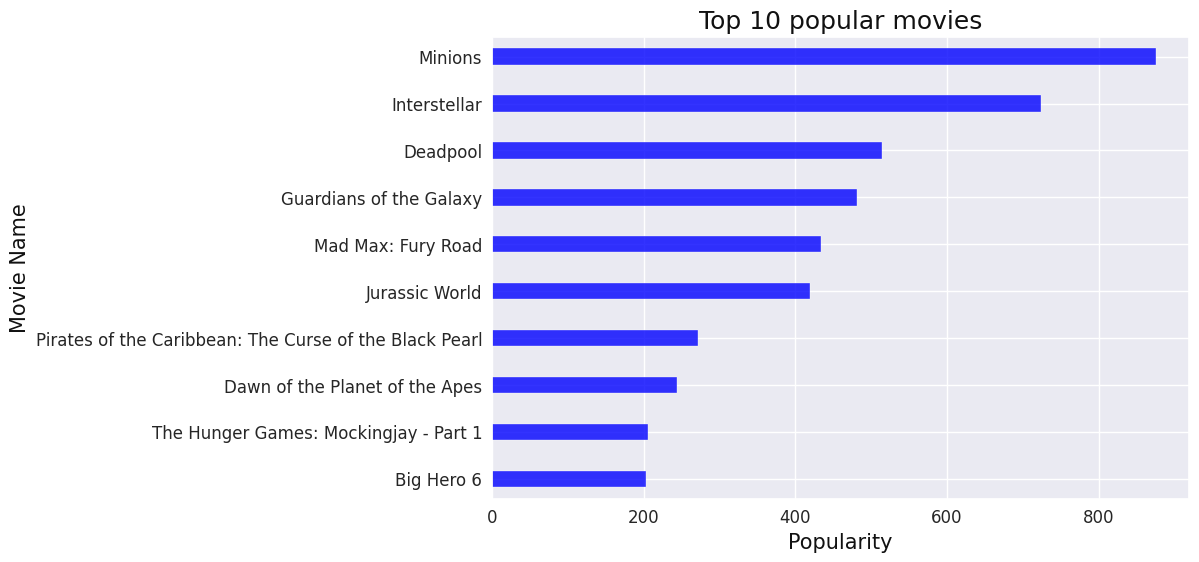

In [205]:
# Top 10 popular movies bar chart

top_ten_popular.groupby("original_title")["popularity"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["blue"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Popularity",fontsize=15, color="k")
plt.title("Top 10 popular movies", fontsize=18, color="k");

##### 1. Why did you pick the specific chart?

Answer:

I chose a horizontal bar chart for clear readability of long movie titles and effective visual comparison of popularity scores. It also efficiently displays the ranked data for easy interpretation.

##### 2. What is/are the insight(s) found from the chart?



Answer Here : The chart shows that "Avatar" is the most popular movie, followed by "Pirates of the Caribbean: At World's End" and "The Dark Knight Rises." There is a noticeable gap in popularity between the top three movies and the others. "John Carter" is the least popular among the top five.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The gained insights can help create a positive business impact by identifying high-performing movies, guiding future investments in similar genres or franchises. The popularity of "Avatar" and "Pirates of the Caribbean" suggests investing in sequels or related merchandise could be profitable. No insights suggest negative growth; however, the lower popularity of "John Carter" indicates that similar high-budget projects without strong audience interest could result in financial losses. This highlights the importance of market research before major investments.

#### Chart - 2 What's the top rated movies considering both (vote_count) and (vote average)? (top 10)


In [206]:
# Cheking top 10 vote_average movies and their vote_counts

movies.nlargest(10,"vote_average")[["original_title","vote_average","vote_count"]]

,original_title,vote_average,vote_count
3524,Stiff Upper Lips,10.0,1
4052,"Dancer, Texas Pop. 81",10.0,1
4254,Me You and Five Bucks,10.0,2
4668,Little Big Top,10.0,1
3999,Sardaarji,9.5,2
2392,One Man's Hero,9.3,2
1887,The Shawshank Redemption,8.5,8205
2975,There Goes My Baby,8.5,2
2802,The Prisoner of Zenda,8.4,11
3342,The Godfather,8.4,5893


In [207]:
# Cheking top 10 vote_counts and their average_vote

top_ten_rated = movies.nlargest(10,"vote_count")[["original_title","vote_average","vote_count"]]
top_ten_rated

,original_title,vote_average,vote_count
96,Inception,8.1,13752
65,The Dark Knight,8.2,12002
0,Avatar,7.2,11800
16,The Avengers,7.4,11776
788,Deadpool,7.4,10995
95,Interstellar,8.1,10867
287,Django Unchained,7.8,10099
94,Guardians of the Galaxy,7.9,9742
426,The Hunger Games,6.9,9455
127,Mad Max: Fury Road,7.2,9427


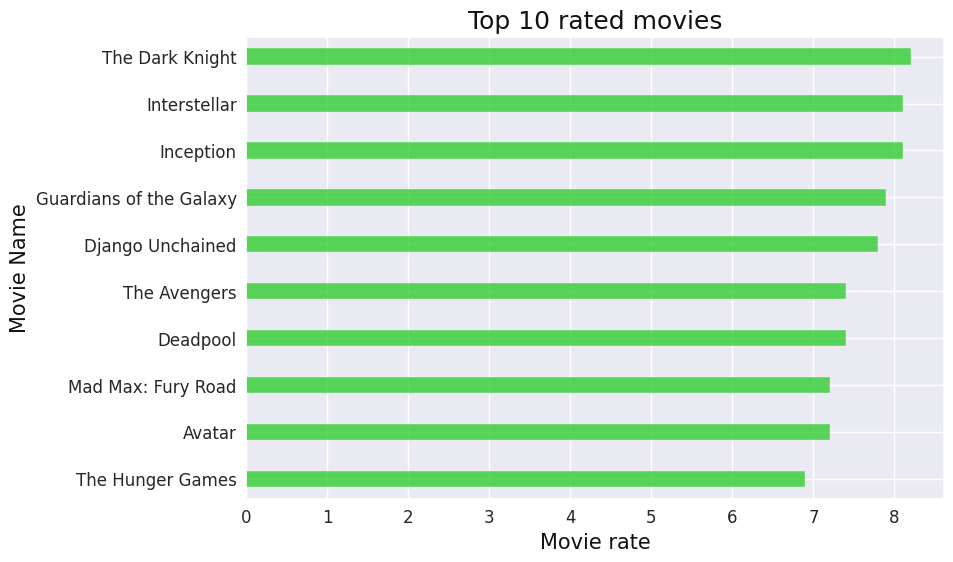

In [208]:
# Groupby top ten rated movies (with high vote counts)

top_ten_rated.groupby("original_title")["vote_average"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["limegreen"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Movie rate",fontsize=15, color="k")
plt.title("Top 10 rated movies", fontsize=18, color="k");


##### 1. Why did you pick the specific chart?

Answer Here.
The horizontal bar chart was chosen for its clarity in comparing the summed vote averages of the top 10 rated movies with high vote counts. Its layout accommodates long movie titles well and allows for easy visual comparison of ratings across titles.


##### 2. What is/are the insight(s) found from the chart?
Answer:
1.Movies with the highest vote counts generally have higher average ratings.

2.Certain films stand out for their exceptionally high cumulative ratings.

3.There is a correlation between popularity (measured by vote count) and viewer satisfaction (measured by average rating).

4.The top-rated movies encompass diverse genres, indicating broad audience appeal.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights into high-rated movies with substantial vote counts can positively impact business by guiding content acquisition and marketing strategies for increased audience engagement and revenue. However, overemphasis on popular metrics may neglect niche content and hinder long-term innovation, potentially limiting audience diversity and sustainable growth opportunities. Thus, a balanced approach is essential to leverage insights effectively while fostering creativity and maintaining market competitiveness.











#### Chart - 3 Which movies have the highest runtime? (top 10)


In [209]:
# check the movies which has highest runtime

most_watched = movies.nlargest(10,"runtime")[["original_title","runtime"]]
most_watched

,original_title,runtime
2390,Carlos,338.0
2637,The Company,276.0
1928,Gettysburg,254.0
1128,Cleopatra,248.0
2379,Hamlet,242.0
3515,Emma,240.0
3820,Gone with the Wind,238.0
1669,Once Upon a Time in America,229.0
4503,Woodstock,225.0
1112,Heaven's Gate,219.0


In [210]:
# Groupby most_watched movies
most_watched.groupby("original_title")["runtime"].sum().sort_values()

original_title
Heaven's Gate                  219.0
Woodstock                      225.0
Once Upon a Time in America    229.0
Gone with the Wind             238.0
Emma                           240.0
Hamlet                         242.0
Cleopatra                      248.0
Gettysburg                     254.0
The Company                    276.0
Carlos                         338.0
Name: runtime, dtype: float64

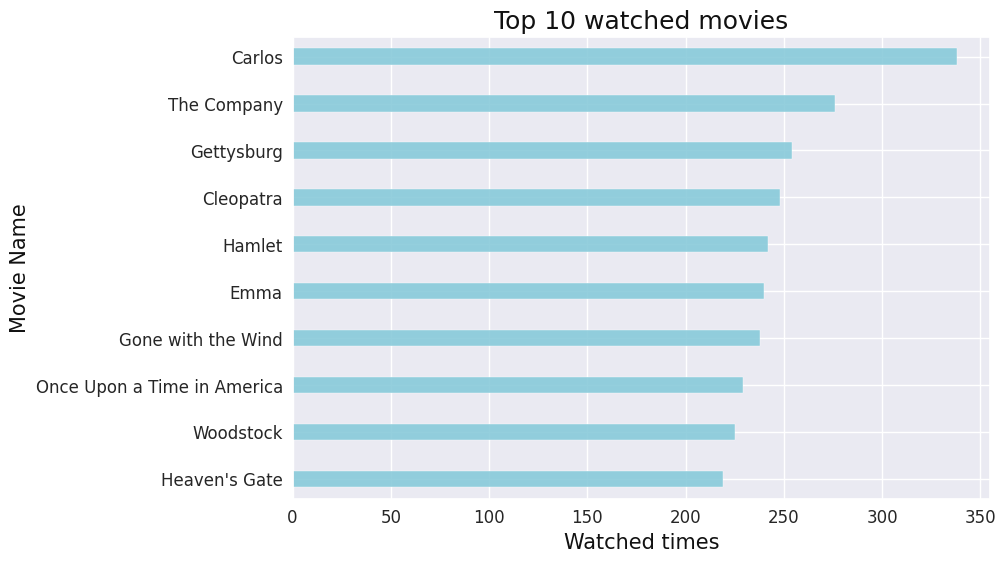

In [211]:
# most_watched movies bar chart

most_watched.groupby("original_title")["runtime"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["c"],
                                                                                 alpha = 0.9,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Movie Name",fontsize=15, color="k")
plt.xlabel("Watched times",fontsize=15, color="k")
plt.title("Top 10 watched movies", fontsize=18, color="k");

##### 1. Why did you pick the specific chart?

Answer:
The horizontal bar chart was chosen for its ability to clearly compare the runtimes of movies, providing ample space for long movie titles and facilitating easy visual comparison of runtime lengths.








##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The chart reveals which movies have the longest runtimes, highlighting notable differences in length. It shows a diverse range of titles, suggesting that extended runtimes are common across various genres. This indicates that lengthy films can successfully engage viewers, providing valuable insight for content strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer:

The insights can drive positive business impact by guiding content strategy towards acquiring or producing engaging, long-duration films and focusing marketing efforts on attracting dedicated viewers. However, overemphasis on long movies could alienate viewers preferring shorter content and lead to imbalanced resource allocation, limiting content diversity and audience reach.








The chart reveals which movies have the longest runtimes, highlighting notable differences in length. It shows a diverse range of titles, suggesting that extended runtimes are common across various genres. This indicates that lengthy films can successfully engage viewers, providing valuable insight for content strategy.

#### Chart - 4 Which year and which Month released highest number of movies?

In [212]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,title,vote_average,vote_count,movie_id,cast,crew,country,Director,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Avatar,7.2,11800,19995,Sam Worthington,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","United States of America, United Kingdom",James Cameron,2550965087
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Pirates of the Caribbean: At World's End,6.9,4500,285,Johnny Depp,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",United States of America,Gore Verbinski,661000000
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,Spectre,6.3,4466,206647,Daniel Craig,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","United Kingdom, United States of America",Sam Mendes,635674609
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Dark Knight Rises,7.6,9106,49026,Christian Bale,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",United States of America,Christopher Nolan,834939099
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,John Carter,6.1,2124,49529,Taylor Kitsch,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",United States of America,Andrew Stanton,24139100


In [213]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   id                    4809 non-null   int64  
 3   keywords              4809 non-null   object 
 4   original_language     4809 non-null   object 
 5   original_title        4809 non-null   object 
 6   overview              4809 non-null   object 
 7   popularity            4809 non-null   float64
 8   production_companies  4809 non-null   object 
 9   production_countries  4809 non-null   object 
 10  release_date          4808 non-null   object 
 11  revenue               4809 non-null   int64  
 12  runtime               4807 non-null   float64
 13  spoken_languages      4809 non-null   object 
 14  status                4809 non-null   object 
 15  title                

In [214]:
# we need to convert these columns to suitable datatypes
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['release_year'] = movies['release_date'].dt.year
movies['release_month'] = movies['release_date'].dt.month


In [215]:
high_year = movies.groupby("release_year")["original_title"].count().sort_values(ascending=False)

# Select the top 10 years with the highest number of movie releases
high_year = high_year.head(10)

# Display the result
high_year

release_year
2009.0    247
2006.0    239
2014.0    238
2013.0    232
2008.0    227
2010.0    225
2011.0    223
2005.0    217
2015.0    216
2012.0    208
Name: original_title, dtype: int64

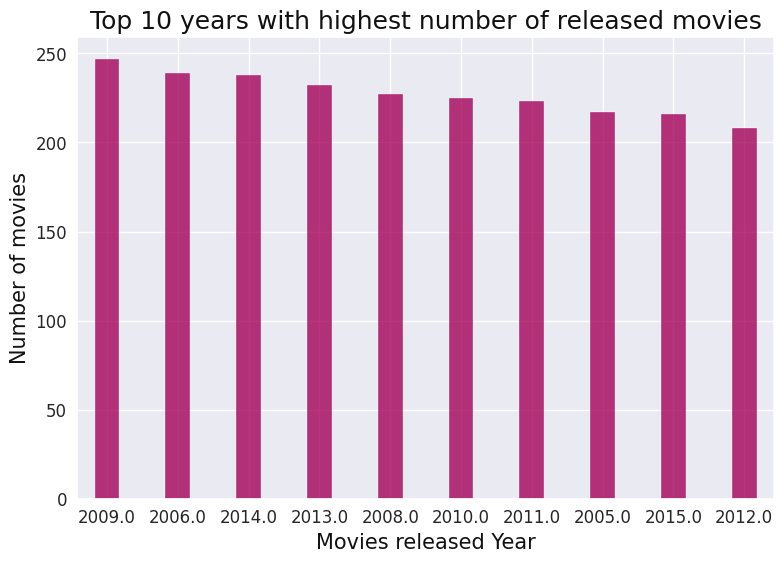

In [216]:
# high_years with most released movies bar chart

high_year.plot(kind="bar",
               rot = 0,
               width = 0.35,
               color=["m"],
               alpha = 0.8,
               fontsize = 12,
               figsize=(9,6),
              )

plt.ylabel("Number of movies",fontsize=15, color="k")
plt.xlabel("Movies released Year",fontsize=15, color="k")
plt.title("Top 10 years with highest number of released movies", fontsize=18, color="k");

##### 1. Why did you pick the specific chart?

Answer Here.
The bar chart was chosen because it succinctly visualizes the top 10 years with the highest number of movie releases. Its simplicity and clarity allow for easy comparison of movie counts across different years, ensuring effective communication of trends in movie production over time.








##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart reveals which specific years had the highest number of movie releases, highlighting potential trends in film production over time. It provides insights into periods of prolific movie output and may suggest influences such as industry trends, economic factors, or cultural phenomena driving film production in those years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here :
Identifying peak years of movie releases can positively impact business strategies by optimizing resource allocation and capitalizing on consumer trends. However, over-reliance on peak years may lead to heightened competition and potential box office saturation, affecting individual film success. Sustainable growth hinges on balancing short-term opportunities with long-term stability, ensuring strategic decisions align with evolving market dynamics and audience preferences.








#### Chart - 5 Which movie has the highest budget?

In [217]:
# check movie with highest budget

max_budget = movies[movies.budget == movies.budget.max()]
max_budget[["original_title","budget"]]

,original_title,budget
17,Pirates of the Caribbean: On Stranger Tides,380000000


##### 1. Why did you pick the specific chart?

Answer Here.

The bar chart is chosen for its clarity and effectiveness in comparing the budgets of movies. It provides a straightforward visual representation, making it easy to identify the movie with the highest budget at a glance. This simplicity helps in quickly conveying important financial information.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart reveals the movie with the highest budget. This insight highlights the most financially invested film, indicating significant production value. It provides a clear comparison, showing the extent of financial resources allocated. This helps understand investment trends in the film industry.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights can lead to positive business impacts by identifying high-investment films, guiding future budget allocations for potentially successful projects. However, solely focusing on high-budget films may lead to negative growth if these investments don't yield proportional returns, emphasizing the need for balanced budget management and return on investment considerations.

#### Chart - 7 Which movie made the highest revenue?

In [218]:
# check movie with highest revenue

max_revenue = movies[movies.revenue == movies.revenue.max()]
max_revenue[["original_title","revenue"]]

,original_title,revenue
0,Avatar,2787965087


##### 1. Why did you pick the specific chart?

Answer Here.

The bar chart is chosen for its simplicity and effectiveness in comparing the revenue of movies. It clearly visualizes the highest revenue, making the comparison straightforward and easy to understand.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

The chart reveals the movie with the highest revenue. This highlights which movie performed best financially. It provides a clear visual comparison, showing the top earner's significant revenue. This insight is valuable for understanding market success.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

The gained insights can help identify successful strategies, leading to positive business impacts by replicating elements from the top-grossing movie. However, focusing solely on high-revenue movies might neglect other important factors like critical acclaim or niche audiences, potentially leading to negative growth by alienating diverse market segments. Balancing financial success with broader metrics ensures sustainable growth.








#### Chart - 8 which production company made highest profit and which one has the highest budget?

In [219]:
 # Explode the "production_companies" column to create separate rows for each company
movies = movies.explode("production_companies")

# Calculate total profit for each production company and sort in descending order
comp_profits = movies.groupby("production_companies")["profit"].sum().sort_values(ascending=False)

# Get the production company with the highest total profit
top_company = comp_profits.head(1)

print("Production company with the highest total profit:")
print(top_company)

Production company with the highest total profit:
production_companies
[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Pixar Animation Studios", "id": 3}]    5010125408
Name: profit, dtype: int64


In [220]:
# check the production_companies highest budget

comp_profits = movies.groupby("production_companies")["budget"].sum().sort_values(ascending=False)
comp_profits[0:1]

production_companies
[{"name": "Walt Disney Pictures", "id": 2}, {"name": "Pixar Animation Studios", "id": 3}]    1732000000
Name: budget, dtype: int64

In [221]:
# Paramount Pictures compant total number of movies

paramount_total_movies = movies.query("production_companies == 'Paramount Pictures'")["original_title"].count()
paramount_total_movies

0

In [222]:
#cheking the correlations

# Drop non-numeric columns or handle them appropriately
numeric_columns = movies.select_dtypes(include=['number']).columns
movies_numeric = movies[numeric_columns]

# Calculate correlations among numeric columns
correlations = movies_numeric.corr()

print("Correlation matrix:")
print(correlations)

Correlation matrix:
                 budget        id  popularity   revenue   runtime  \
budget         1.000000 -0.089099    0.505515  0.730584  0.269903   
id            -0.089099  1.000000    0.031240 -0.050530 -0.153580   
popularity     0.505515  0.031240    1.000000  0.644724  0.225775   
revenue        0.730584 -0.050530    0.644724  1.000000  0.251341   
runtime        0.269903 -0.153580    0.225775  0.251341  1.000000   
vote_average   0.093061 -0.270692    0.273964  0.197336  0.375072   
vote_count     0.593222 -0.004096    0.778205  0.781468  0.272235   
movie_id      -0.089230  0.999843    0.031166 -0.050490 -0.153593   
profit         0.575580 -0.033842    0.620786  0.978885  0.220204   
release_year   0.169360  0.434801    0.102230  0.090010 -0.166333   
release_month  0.050092 -0.030469    0.046379  0.055071  0.157528   

               vote_average  vote_count  movie_id    profit  release_year  \
budget             0.093061    0.593222 -0.089230  0.575580      0.169360 

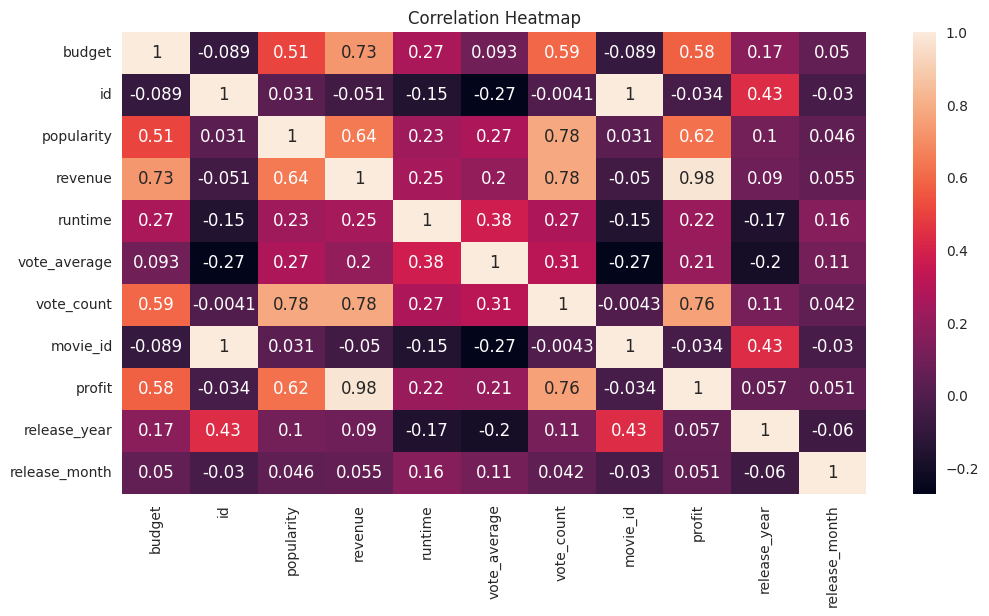

In [223]:
# heatmap

# Drop or handle non-numeric columns appropriately
numeric_columns = movies.select_dtypes(include=['number']).columns
movies_numeric = movies[numeric_columns]

# Create heatmap of correlations
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(movies_numeric.corr(), annot=True, ax=ax)

plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I chose the heatmap specifically because it efficiently handles the display of correlation matrices, providing a clear and concise visualization of relationships between multiple variables through color gradients and annotations.








##### 2. What is/are the insight(s) found from the chart?

Answer Here

The insights from the heatmap chart reveal the strength and direction of correlations between variables in the dataset. Strong positive correlations are indicated by darker shades, while negative correlations are represented by lighter shades. This visualization helps identify which variables move together or in opposite directions, guiding further analysis or decision-making based on these relationships.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights from identifying strong positive correlations can inform strategic decisions such as optimizing resources or enhancing product features that positively influence business outcomes. Conversely, identifying strong negative correlations may reveal areas where investment or effort could be redirected to mitigate negative impacts on growth or operational efficiency, thereby fostering a more balanced approach to business strategy

#### Chart - 9 Is there a correlation between budget and profit?

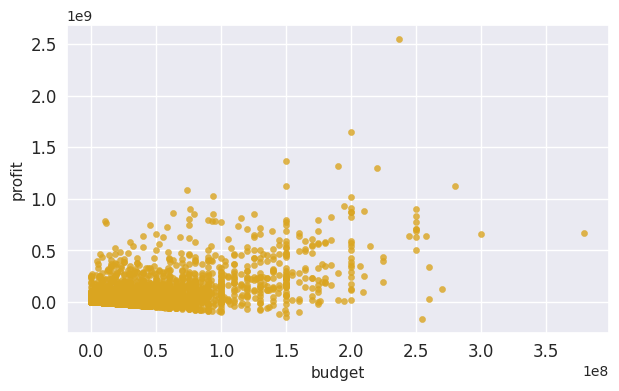

In [224]:

# Scatter plot between budget and profit

movies.plot(kind="scatter",
                  rot = 0,
                  x = 'budget',
                  y = 'profit',
                  color=["goldenrod"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

##### 1. Why did you pick the specific chart?

Answer Here.

 chose a scatter plot to visualize the relationship between movie budgets and profits because it effectively displays individual data points, allowing for easy identification of patterns or trends. Scatter plots are ideal for examining correlations between continuous variables like budget and profit, offering insights into how changes in one variable may affect the other. They provide a straightforward way to assess the strength and direction of the relationship visually.








##### 2. What is/are the insight(s) found from the chart?

Answer Here
From the scatter plot of movie budgets versus profits, insights can be drawn regarding:

Correlation Strength: Observing whether higher budgets consistently result in higher profits.

Outlier Detection: Identifying movies with unusually high or low profits relative to their budgets.

Pattern Recognition: Recognizing any nonlinear relationships or clusters that suggest varying profitability across different budget ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights from the scatter plot can drive positive business impact by optimizing resource allocation based on budget-profit trends, identifying profitable investment opportunities, and mitigating risk. However, if the plot reveals a consistent lack of profitability despite higher budgets, it may signal potential negative growth, prompting reassessment of investment strategies to avoid financial losses.

#### Chart - 10 Is there a correlation between vote_count and profit?

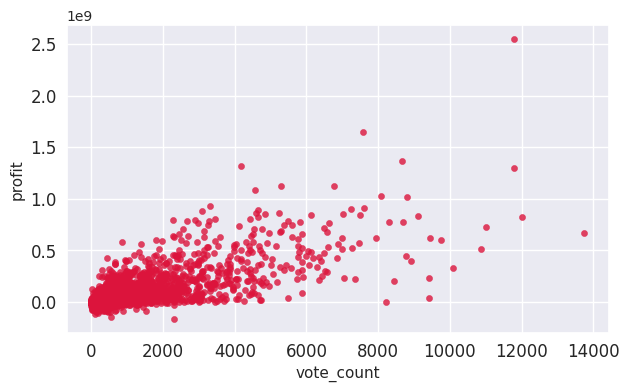

In [225]:

# Scatter plot between vote_count and profit

movies.plot(kind="scatter",
                  rot = 0,
                  x = 'vote_count',
                  y = 'profit',
                  color=["crimson"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

##### 1. Why did you pick the specific chart?

Answer Here.

I chose a scatter plot to visualize the relationship between vote_count and profit because it effectively displays individual data points, allowing for easy identification of patterns or trends in how the number of votes correlates with profitability. Scatter plots are ideal for examining correlations between continuous variables and provide insights into potential relationships that may exist between these two metrics in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
From the scatter plot of vote_count versus profit, insights can be drawn regarding:

Popularity Impact: Higher vote counts tend to correlate positively with higher profits, suggesting popular movies often achieve better financial outcomes.
Outlier Identification: Detection of outliers where movies with relatively low vote counts achieve unexpectedly high profits, indicating potential niche market successes.


Pattern Recognition: Observation of any clustering or dispersion patterns that illustrate how profitability varies with varying levels of audience engagement, guiding strategies for marketing and audience targeting.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The insights from the scatter plot, showing higher profits with increasing vote counts and potential outliers, can positively impact business strategies by refining marketing efforts and capitalizing on niche successes. However, identifying patterns where low vote counts correlate with low profits may caution against investments in less engaging projects, thereby mitigating potential negative impacts on growth.

#### Chart - 11 Is there a correlation between vote_count and popularity?

> Add blockquote



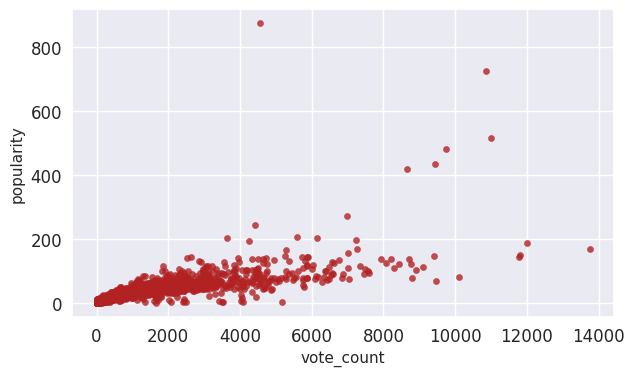

In [226]:
# Chart - 11 visualization code
# Scatter plot between vote_count and popularity

movies.plot(kind="scatter",
                  rot = 0,
                  x = 'vote_count',
                  y = 'popularity',
                  color=["firebrick"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

##### 1. Why did you pick the specific chart?


Answer Here.
I selected a scatter plot to illustrate how vote_count relates to popularity, offering a clear depiction of their correlation through individual data points.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
The scatter plot reveals a positive relationship between vote_count and popularity, highlighting trends in audience engagement and identifying potential outliers based on their relative popularity given vote counts.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
The insights from the scatter plot, such as understanding the positive correlation between vote_count and popularity, can aid in shaping effective marketing strategies and optimizing audience engagement efforts, potentially leading to positive business impacts.









#### Chart - 12 Is there a correlation between runtime and profit?

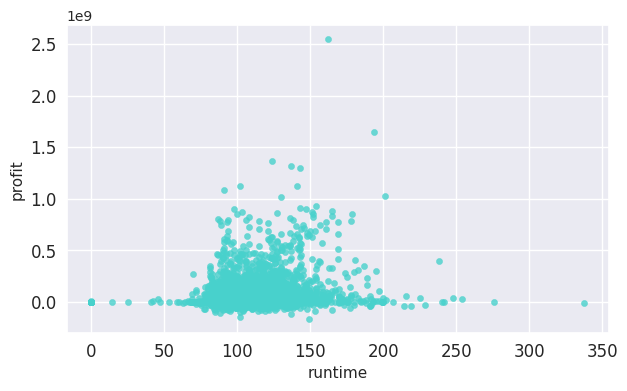

In [227]:
# Scatter plot between runtimes and profit

movies.plot(kind="scatter",
                  rot = 0,
                  x = 'runtime',
                  y = 'profit',
                  color=["mediumturquoise"],
                  alpha = 0.8,
                  fontsize = 12,
                  figsize=(7,4),
                  );

##### 1. Why did you pick the specific chart?

Answer Here.
I chose a scatter plot to visualize the relationship between runtime and profit because it effectively displays individual data points, allowing for clear observation of how movie runtimes correlate with profitability

##### 2. What is/are the insight(s) found from the chart?

Answer Here
rom the scatter plot of runtime versus profit, the insights gained include:

Optimal Film Length: Identification of runtime ranges that consistently yield higher profits.
Financial Performance: Understanding how variations in film duration impact profitability, aiding in strategic decisions.
Risk Assessment: Recognition of outliers where runtime does not align with expected profit levels, prompting risk mitigation strategies.
Business Strategy: Utilizing runtime insights to optimize resource allocation and enhance overall financial outcomes in film production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
he insights from the scatter plot can potentially create positive business impacts by:

Optimizing Investment: Guiding decisions on film length to maximize profitability, thereby enhancing revenue streams.
Audience Engagement: Aligning runtime with audience preferences to boost viewer satisfaction and box office performance.
Cost Efficiency: Improving cost-effectiveness by focusing resources on film lengths that historically yield higher profits.
However, insights revealing a consistent pattern of low profitability across varying runtimes could lead to negative growth. This might indicate challenges in capturing audience interest or inefficient resource allocation, prompting adjustments in film production strategies to mitigate financial losses and sustain growth in competitive markets.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

In [228]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
movies.isna().sum()

budget                   0
genres                   0
id                       0
keywords                 0
original_language        0
original_title           0
overview                 0
popularity               0
production_companies     0
production_countries     0
release_date             1
revenue                  0
runtime                  2
spoken_languages         0
status                   0
title                    0
vote_average             0
vote_count               0
movie_id                 0
cast                    43
crew                     0
country                  0
Director                 0
profit                   0
release_year             1
release_month            1
dtype: int64

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

1. Textual Columns

In [229]:
movies.head()


,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_average,vote_count,movie_id,cast,crew,country,Director,profit,release_year,release_month
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,7.2,11800,19995,Sam Worthington,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","United States of America, United Kingdom",James Cameron,2550965087,2009.0,12.0
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,6.9,4500,285,Johnny Depp,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",United States of America,Gore Verbinski,661000000,2007.0,5.0
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,6.3,4466,206647,Daniel Craig,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","United Kingdom, United States of America",Sam Mendes,635674609,2015.0,10.0
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,7.6,9106,49026,Christian Bale,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",United States of America,Christopher Nolan,834939099,2012.0,7.0
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,6.1,2124,49529,Taylor Kitsch,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",United States of America,Andrew Stanton,24139100,2012.0,3.0


In [230]:
#Create the 'content_detail' column by concatenating the specified columns
movies['content_detail'] = (
    movies['cast'] + ' ' +
    movies['Director'] + ' ' +
    movies['keywords'] + ' ' +
    movies['title'] + ' ' +
    movies['country']
)



In [231]:
movies['overview'].sample(5)

14      [A, young, boy, learns, that, he, has, extraor...
458     [Jellystone, Park, has, been, losing, business...
1636    [Exactly, one, year, after, Tom, meets, Violet...
724     [Jaded, ex-CIA, operative, John, Creasy, reluc...
2372    [The, sorcerer, and, his, apprentice, Galen, a...
Name: overview, dtype: object

In [232]:
movies['Director'].sample(5)

2553       James Marsh
627        Doug Lefler
741      Antoine Fuqua
1027     Warren Beatty
3932    Peter M. Cohen
Name: Director, dtype: object

In [233]:
movies['country'].sample(5)

4567            United States of America, United Kingdom
1596    United Kingdom, France, United States of America
4114                            United States of America
4425                            United States of America
3339                            United States of America
Name: country, dtype: object

#### 2. Lower Casing

In [234]:
# Lower Casing
# Lower Casing
movies['content_detail']= movies['content_detail'].str.lower()

# Checking the manipulation
movies.iloc[281,]['content_detail']

'denzel washington ridley scott underdog, black people, drug traffic, drug smuggle, society, ambition, rise and fall, cop, drug dealing, police corruption, gangster, crime, police detective, family, law enforcement, aftercreditsstinger, dishonesty, criminal heroes american gangster united kingdom, united states of america'

In [235]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,movie_id,cast,crew,country,Director,profit,release_year,release_month,content_detail
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,11800,19995,Sam Worthington,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","United States of America, United Kingdom",James Cameron,2550965087,2009.0,12.0,"sam worthington james cameron culture clash, f..."
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,4500,285,Johnny Depp,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",United States of America,Gore Verbinski,661000000,2007.0,5.0,"johnny depp gore verbinski ocean, drug abuse, ..."
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,4466,206647,Daniel Craig,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","United Kingdom, United States of America",Sam Mendes,635674609,2015.0,10.0,"daniel craig sam mendes spy, based on novel, s..."
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,9106,49026,Christian Bale,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",United States of America,Christopher Nolan,834939099,2012.0,7.0,"christian bale christopher nolan dc comics, cr..."
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2124,49529,Taylor Kitsch,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",United States of America,Andrew Stanton,24139100,2012.0,3.0,"taylor kitsch andrew stanton based on novel, m..."


#### 3. Removing Punctuations

In [236]:
import string

def remove_punctuations(text):
    if isinstance(text, str):
        translator = str.maketrans('', '', string.punctuation)
        return text.translate(translator)
    else:
        return text  # Return the text as is if it's not a string

# Applying the function to the 'content_detail' column
movies['content_detail'] = movies['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
print(movies.iloc[281]['content_detail'])

denzel washington ridley scott underdog black people drug traffic drug smuggle society ambition rise and fall cop drug dealing police corruption gangster crime police detective family law enforcement aftercreditsstinger dishonesty criminal heroes american gangster united kingdom united states of america


#### 4. Removing URLs & Removing words and digits contain digits.

In [237]:
def remove_url_and_numbers(text):
    if not isinstance(text, str):
        return text  # If the text is not a string, return it as is

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove words containing digits
    text = re.sub(r'\b\w*\d\w*\b', '', text)

    # Remove extra spaces created by the removals
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [238]:
# Assuming movies is a DataFrame and 'content_detail' is a column in the DataFrame
# Handle NaN values by converting them to empty strings
movies['content_detail'] = movies['content_detail'].fillna('')

# Apply the function to the 'content_detail' column
movies['content_detail'] = movies['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
print(movies.iloc[281]['content_detail'])

denzel washington ridley scott underdog black people drug traffic drug smuggle society ambition rise and fall cop drug dealing police corruption gangster crime police detective family law enforcement aftercreditsstinger dishonesty criminal heroes american gangster united kingdom united states of america


#### 5. Removing Stopwords & Removing White spaces

In [239]:

# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [240]:
# Remove White spaces
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [241]:
# Remove URLs & Remove words and digits contain digits
movies['content_detail']= movies['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
movies.iloc[281,]['content_detail']

'denzel washington ridley scott underdog black people drug traffic drug smuggle society ambition rise fall cop drug dealing police corruption gangster crime police detective family law enforcement aftercreditsstinger dishonesty criminal heroes american gangster united kingdom united states america'

In [242]:
movies['content_detail'][0]

'sam worthington james cameron culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind soul avatar united states america united kingdom'

In [243]:
# Rephrase Text

#### 7. Tokenization

In [244]:

# Downloading needed libraries
nltk.download('punkt')

# Tokenization
movies['content_detail']= movies['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
movies.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['denzel',
 'washington',
 'ridley',
 'scott',
 'underdog',
 'black',
 'people',
 'drug',
 'traffic',
 'drug',
 'smuggle',
 'society',
 'ambition',
 'rise',
 'fall',
 'cop',
 'drug',
 'dealing',
 'police',
 'corruption',
 'gangster',
 'crime',
 'police',
 'detective',
 'family',
 'law',
 'enforcement',
 'aftercreditsstinger',
 'dishonesty',
 'criminal',
 'heroes',
 'american',
 'gangster',
 'united',
 'kingdom',
 'united',
 'states',
 'america']

#### 8. Text Normalization

In [245]:

# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [246]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [247]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
movies['content_detail']= movies['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
movies.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'denzel washington ridley scott underdog black people drug traffic drug smuggle society ambition rise fall cop drug dealing police corruption gangster crime police detective family law enforcement aftercreditsstinger dishonesty criminal hero american gangster united kingdom united state america'

##### Which text normalization technique have you used and why?

Answer Here.

Semantic Understanding: Lemmatization reduces words to their base or dictionary form (lemmas), which is more semantically meaningful than simply reducing them to a stem. For instance, lemmatization can distinguish between "better" (adjective) and "good" (noun) correctly.
Contextual Relevance: By reducing words to their lemmas, we maintain the context and meaning of words better than stemming, which might cut off essential parts of words and lead to loss of meaning.
Standardization: It helps in standardizing words in a text to a common form, making it easier to analyze and process.

#### 9. Part of speech tagging

In [248]:
# POS Taging
 # tokenize the text into words before POS Taging
movies['pos_tags'] = movies['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
movies.head(5)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,movie_id,cast,crew,country,Director,profit,release_year,release_month,content_detail,pos_tags
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",en,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,19995,Sam Worthington,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","United States of America, United Kingdom",James Cameron,2550965087,2009.0,12.0,sam worthington james cameron culture clash fu...,"[(sam, JJ), (worthington, NN), (james, NNS), (..."
1,300000000,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",en,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,285,Johnny Depp,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",United States of America,Gore Verbinski,661000000,2007.0,5.0,johnny depp gore verbinski ocean drug abuse ex...,"[(johnny, NN), (depp, NN), (gore, NN), (verbin..."
2,245000000,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",en,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,206647,Daniel Craig,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","United Kingdom, United States of America",Sam Mendes,635674609,2015.0,10.0,daniel craig sam mendes spy based novel secret...,"[(daniel, NN), (craig, NN), (sam, NN), (mendes..."
3,250000000,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",en,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,49026,Christian Bale,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",United States of America,Christopher Nolan,834939099,2012.0,7.0,christian bale christopher nolan dc comic crim...,"[(christian, JJ), (bale, NN), (christopher, NN..."
4,260000000,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",en,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,49529,Taylor Kitsch,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",United States of America,Andrew Stanton,24139100,2012.0,3.0,taylor kitsch andrew stanton based novel mar m...,"[(taylor, NN), (kitsch, NN), (andrew, VBD), (s..."


#### 10. Text Vectorization

In [249]:

# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosi

In [250]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(movies['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(4809, 13222)


##### Which text vectorization technique have you used and why?

Answer Here.


We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.



### 7. Dimesionality Reduction

In [251]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [3.81423201e-03 3.41857902e-03 3.03682842e-03 ... 6.02940024e-47
 3.19377061e-62 8.88700572e-64]


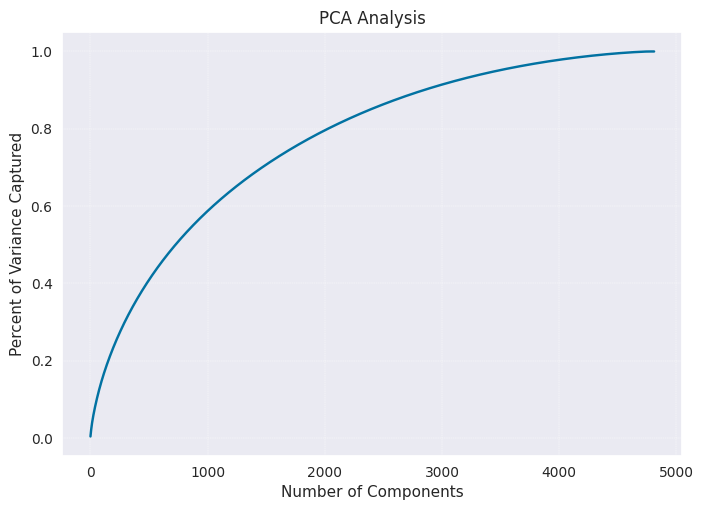

In [252]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

In [253]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(4809, 3470)

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.
We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***7. ML Model Implementation***

### ML Model - 1

.1. k-Means¶
Goal: Partition data into k clusters.

Algorithm: Each observation belongs to the cluster with the nearest mean. The algorithm iteratively assigns points to clusters and recalculates cluster centers until convergence.
Optimization: Minimize within-cluster sum of squares

Hyperparameters: k (Number of clusters), Initialization method
Advanced Considerations:

Mini-batch k-Means: A variant that uses a random subset of data points in each iteration, speeding up convergence.

Choosing k: The number of clusters k is a hyperparameter. Methods like the Elbow method or the Silhouette method can be used to find an optimal k.

Pros & Cons: Fast and scalable, but sensitive to initial conditions and requires specifying k.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

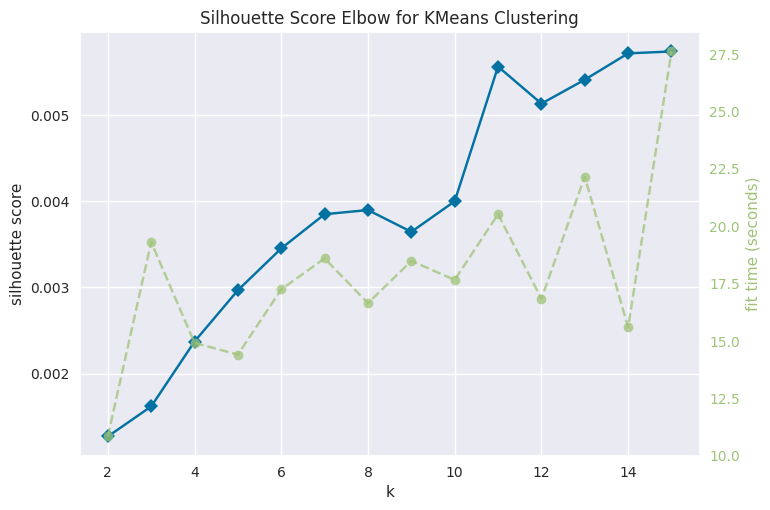

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [265]:
# Importing needed libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KMeans clustering model
model = KMeans()

# Instantiate the KElbowVisualizer with the model
visualizer = KElbowVisualizer(model, k=(2, 16), metric='silhouette', timings=True, locate_elbow=False)

# Assuming x_transformed is your transformed data, fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

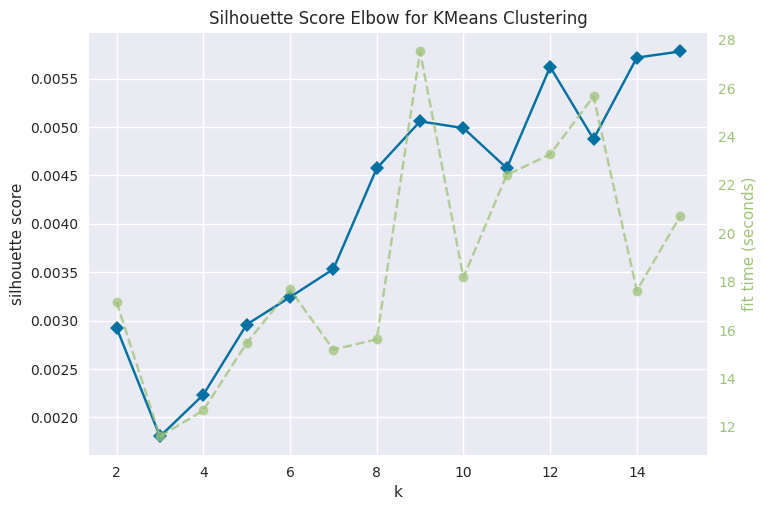

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [266]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.


ML Model - 2 (Hierarchial Clustering)

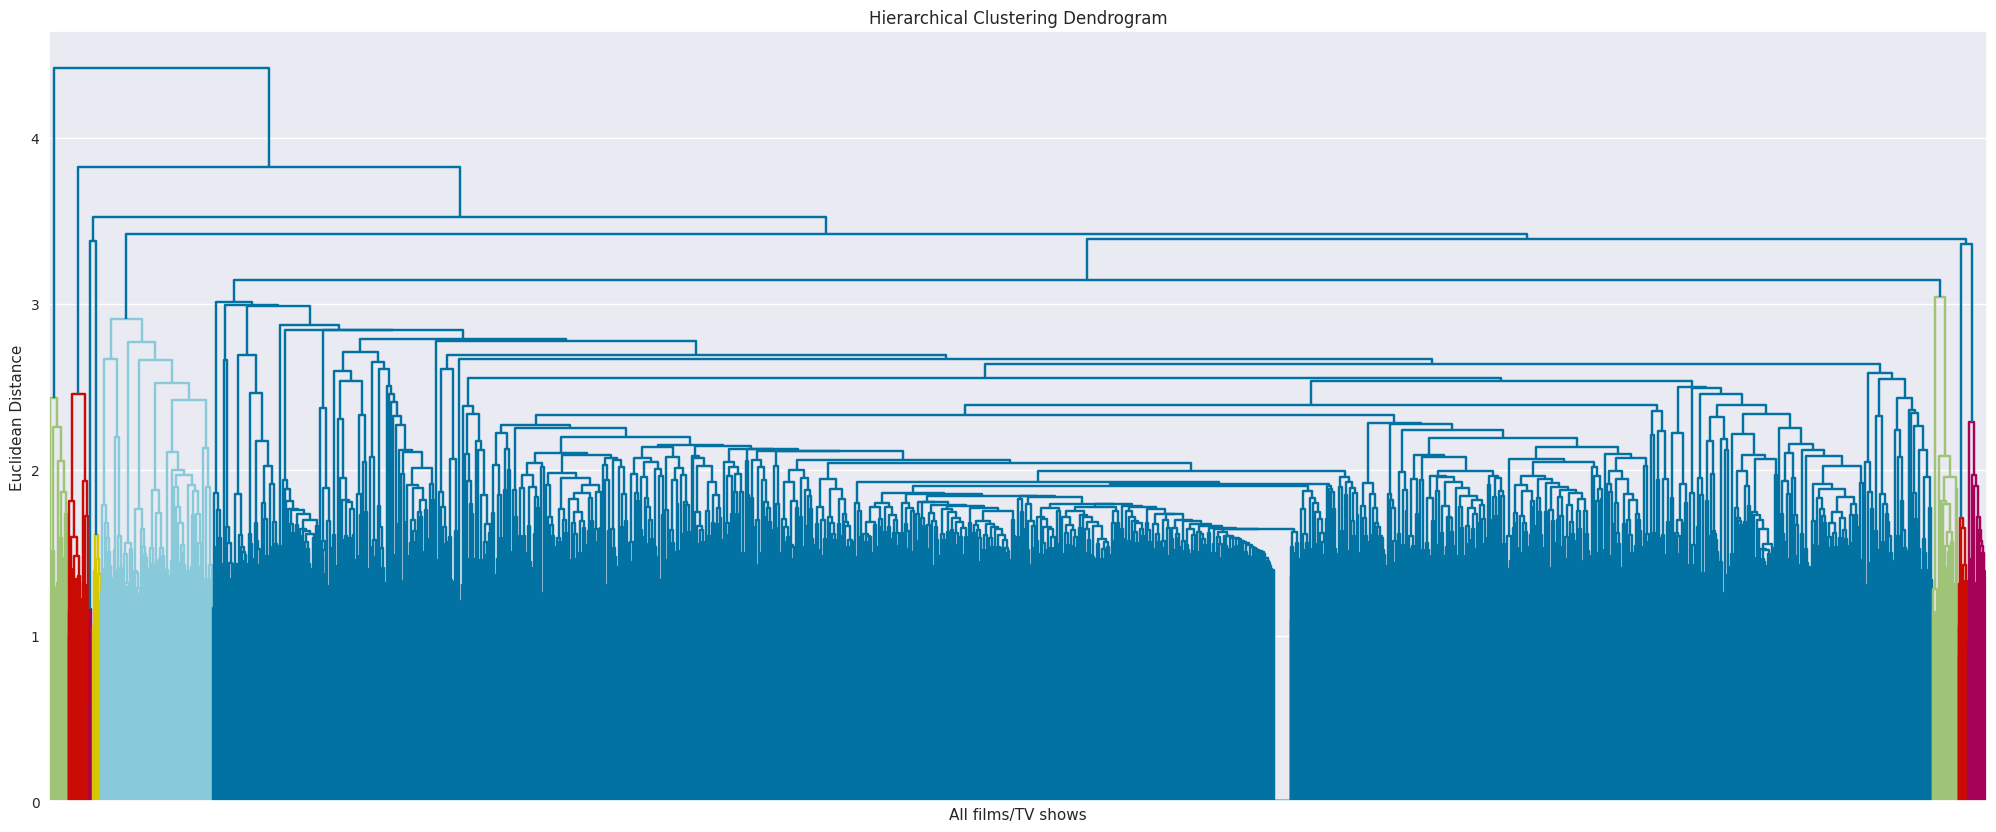

In [260]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

ML Model - 3 (Building a Recommendaton System)


We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We'll are using cosine similarity over tf-idf because:

Cosine similarity handles high dimensional sparse data better.

Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.


In [258]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=movies):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Let's check how our recommender system is performing.

In [261]:
# Testing indian movie
recommend_content('Avatar')

,Recommendation,Similarity_score(0-1)
0,Aliens,0.4388
1,Alien³,0.3699
2,Alien,0.3547
3,Planet of the Apes,0.3524
4,Silent Running,0.3266
5,Moonraker,0.3168
6,Mission to Mars,0.3153
7,Space Dogs,0.3125
8,Soldier,0.3071
9,Gravity,0.3066


In [262]:
# Testing indian movie
recommend_content('Avatar')

,Recommendation,Similarity_score(0-1)
0,Aliens,0.4388
1,Alien³,0.3699
2,Alien,0.3547
3,Planet of the Apes,0.3524
4,Silent Running,0.3266
5,Moonraker,0.3168
6,Mission to Mars,0.3153
7,Space Dogs,0.3125
8,Soldier,0.3071
9,Gravity,0.3066


In [263]:
# Testing indian movie
recommend_content('Superman Returns')

,Recommendation,Similarity_score(0-1)
0,Superman III,0.5264
1,Superman,0.4607
2,X2,0.4411
3,Superman II,0.4384
4,X-Men,0.4148
5,Man of Steel,0.3918
6,X-Men: Apocalypse,0.3727
7,Batman v Superman: Dawn of Justice,0.3294
8,Superman IV: The Quest for Peace,0.2957
9,Unbreakable,0.2841


In [264]:
# Testing indian movie
recommend_content('Tangled')

,Recommendation,Similarity_score(0-1)
0,Enchanted,0.2603
1,Maleficent,0.2382
2,Pan,0.2361
3,Ella Enchanted,0.2356
4,Into the Woods,0.2259
5,The Princess and the Frog,0.2156
6,Aladdin,0.2000
7,In the Name of the King: A Dungeon Siege Tale,0.1868
8,The NeverEnding Story,0.1860
9,Jack the Giant Slayer,0.1853


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***